### Univariate Distribution of Features

#### Load and Examine Data

In [164]:
# Import libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [165]:
# Read in data, examine first few rows
df = pd.read_csv("../data/train.csv")
pd.set_option('display.max_columns', None)
df.head(5)

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,vent_hist,renal_issue,pulm_severe,prim_disease_hct,hla_high_res_6,cmv_status,hla_high_res_10,hla_match_dqb1_high,tce_imm_match,hla_nmdp_6,hla_match_c_low,rituximab,hla_match_drb1_low,hla_match_dqb1_low,prod_type,cyto_score_detail,conditioning_intensity,ethnicity,year_hct,obesity,mrd_hct,in_vivo_tcd,tce_match,hla_match_a_high,hepatic_severe,donor_age,prior_tumor,hla_match_b_low,peptic_ulcer,age_at_hct,hla_match_a_low,gvhd_proph,rheum_issue,sex_match,hla_match_b_high,race_group,comorbidity_score,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,No,No,No,IEA,6.0,+/+,NaN,2.0,NaN,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2016,No,NaN,Yes,NaN,2.0,No,NaN,No,2.0,No,9.942,2.0,FKalone,No,M-F,2.0,More than one race,0.0,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,No,No,No,AML,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,PB,Intermediate,MAC,Not Hispanic or Latino,2008,No,Positive,No,Permissive,2.0,No,72.29,No,2.0,No,43.705,2.0,Other GVHD Prophylaxis,No,F-F,2.0,Asian,3.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,HIS,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2019,No,NaN,Yes,NaN,2.0,No,NaN,No,2.0,No,33.997,2.0,Cyclophosphamide alone,No,F-M,2.0,More than one race,0.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,ALL,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,Intermediate,MAC,Not Hispanic or Latino,2009,No,Positive,No,Permissive,2.0,No,29.23,No,2.0,No,43.245,2.0,FK+ MMF +- others,No,M-M,2.0,White,0.0,90.0,Yes,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,No,No,No,MPN,6.0,+/+,10.0,2.0,NaN,5.0,2.0,No,2.0,2.0,PB,NaN,MAC,Hispanic or Latino,2018,No,NaN,Yes,NaN,2.0,No,56.81,No,2.0,No,29.740,2.0,TDEPLETION +- other,No,M-F,2.0,American Indian or Alaska Native,1.0,90.0,No,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


In [124]:
print("This data set frame has {} rows and {} columns".format(df.shape[0], df.shape[1]))

This data set frame has 28800 rows and 60 columns


In [125]:
# Check the percent of values in ech column that are missing. 
# We see that there are eight features with 20% or more missing values,
# and two features with over 50% missing values.
# The two column which encode our target (efs and efs_time)
# have no missing values.

pd.DataFrame(df.isna().sum()/df.shape[0] * 100).reset_index() \
    .rename(columns={"index":"Feature", 0:"Percent Missing"}) \
    .sort_values(by="Percent Missing", ascending=False)

,Feature,Percent Missing
33,tce_match,65.958333
31,mrd_hct,57.628472
26,cyto_score_detail,41.399306
50,tce_div_match,39.569444
19,tce_imm_match,38.656250
3,cyto_score,28.013889
17,hla_high_res_10,24.871528
6,hla_high_res_8,20.239583
15,hla_high_res_6,18.347222
18,hla_match_dqb1_high,18.052083


In [126]:
# For now, we will keep all rows and columns--even those with missing data.
# We drop the ID column, which does not contain information useful for modeling.
# We also replace the numerical values in the efs column
# with text values, which are easier to interpret.

df = df.drop("ID", axis=1)
df['efs'] = df['efs'].replace({0:"Censored", 1:"Event"})

In [127]:
# Check which datatypes exist in the data.
# We have dtype 'O' (for 'object', pandas categorical datatype)
# as well as integer and floating-point datatypes.
# We will confirm that the datatype for each column makes sense
# when we examine the columns individually.
df.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [128]:
# Compute basic descriptive statistics for numerical variables.
# It appears that many of these features take just a few 
# integer values. 

df_numeric = df.select_dtypes(['float64', 'int64'])
df_numeric.describe()

,hla_match_c_high,hla_high_res_8,hla_low_res_6,hla_high_res_6,hla_high_res_10,hla_match_dqb1_high,hla_nmdp_6,hla_match_c_low,hla_match_drb1_low,hla_match_dqb1_low,year_hct,hla_match_a_high,donor_age,hla_match_b_low,age_at_hct,hla_match_a_low,hla_match_b_high,comorbidity_score,karnofsky_score,hla_low_res_8,hla_match_drb1_high,hla_low_res_10,efs_time
count,24180.000000,22971.000000,25530.000000,23516.000000,21637.000000,23601.000000,24603.000000,26000.000000,26157.000000,24606.000000,28800.000000,24499.000000,26992.000000,26235.000000,28800.000000,26410.000000,24712.00000,28323.000000,27930.00000,25147.000000,25448.000000,23736.000000,28800.000000
mean,1.764516,6.876801,5.143322,5.109202,8.617230,1.736876,5.160346,1.757808,1.715296,1.773795,2015.179444,1.703743,42.511591,1.719916,38.663162,1.709087,1.69962,1.702327,83.83208,6.903448,1.707128,8.664687,23.237678
std,0.431941,1.564313,1.207757,1.214162,1.905125,0.447687,1.203240,0.435453,0.451282,0.427130,3.153914,0.462213,15.251434,0.454449,21.147581,0.458259,0.46518,1.994443,11.02884,1.565017,0.461179,1.882746,24.799748
min,0.000000,2.000000,2.000000,0.000000,3.000000,0.000000,2.000000,0.000000,1.000000,0.000000,2008.000000,0.000000,18.010000,0.000000,0.044000,0.000000,0.00000,0.000000,40.00000,2.000000,0.000000,4.000000,0.333000
25%,2.000000,6.000000,4.000000,4.000000,7.000000,1.000000,4.000000,2.000000,1.000000,2.000000,2013.000000,1.000000,28.447000,1.000000,19.539000,1.000000,1.00000,0.000000,70.00000,6.000000,1.000000,7.000000,5.619750
50%,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,2.000000,2016.000000,2.000000,40.063000,2.000000,41.006000,2.000000,2.00000,1.000000,90.00000,8.000000,2.000000,10.000000,9.796500
75%,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,2.000000,2018.000000,2.000000,56.131500,2.000000,55.965250,2.000000,2.00000,2.000000,90.00000,8.000000,2.000000,10.000000,35.100000
max,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,2.000000,2020.000000,2.000000,84.800000,2.000000,73.726000,2.000000,2.00000,10.000000,100.00000,8.000000,2.000000,10.000000,156.819000


#### Define Helper Functions to Summarize and Plot Features

In [129]:
# Function that takes the name of a discrete feature
# and produces a barplot of the number of 
# cases for each value of the feature.
# May be used for either categorical features
# or integer features which only take a
# few distinct values.

def plot_discrete_feature(feat_name, df=df, tick_angle = 0, figsize=(5, 3)):
    fig, ax = plt.subplots(figsize=figsize)
    cat_order = None
    if df[feat_name].dtype == 'O':
        cat_order = df[feat_name].value_counts().index.to_list()
    sns.countplot(df, x = feat_name, order=cat_order)
    plt.xlabel(feat_name)
    plt.ylabel("Number of cases ")
    plt.title("Number of cases by {}".format(feat_name))
    ax.tick_params(axis='x', rotation=tick_angle)
    plt.show()

In [130]:
# Function the takes the name of a discrete feature
# and returns a dataframe with the percentage
# of cases that take on each level of the feature.
# Note that this ignores any cases where the
# value of the feature is missing.

def get_percentages(feat_name, df=df):
    percentages = df[feat_name].value_counts()/df[feat_name].count() * 100
    formatted = round(pd.DataFrame(percentages).reset_index(), 2) \
         .rename(columns={"count":"percent"}) 
    
    if df[feat_name].dtype == 'O':
        formatted = formatted.sort_values(by="percent", ascending=False)
    else:
        formatted = formatted.sort_values(by = feat_name)
        
    return formatted

In [131]:
# Function that takes the name of a numeric feature
# and produces a figure with two subplots:
# a boxplot of the feature, and a histogram.
# Boxplots are often useful for detecting outliers,
# while histograms give more insight into the
# overall shape of a distribution.

def plot_numeric_feature(feat_name, data = df, bins=10):
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    fig.suptitle("Distribution of {}".format(feat_name))
    sns.boxplot(data = df, y=feat_name, ax=ax[0])
    sns.histplot(data = df, x=feat_name, ax=ax[1], kde=True, bins=bins)
    plt.subplots_adjust(wspace=0.4)
    ax[1].set_ylabel("Number of cases")
    plt.show()

In [132]:
# While this notebook is mostly for univariate analysis,
# I am including a function here which plots efs_time (survival time)
# broken down by efs (event/censored).
# These two variables can be viewed as jointly encoding
# our true modeling objective (survival time).

def plot_efs_vs_efs_time(bins=10):
    fig, ax = plt.subplots(1, 2, figsize=(12, 3))
    fig.suptitle("Distribution of efs_time by efs")
    sns.boxplot(data = df, y="efs_time", hue="efs", ax=ax[0])
    sns.histplot(data = df, x="efs_time", hue="efs", ax=ax[1], multiple='stack', bins=bins)
    plt.subplots_adjust(wspace=0.3)
    ax[0].legend([], [], frameon=False)
    ax[1].set_ylabel("Number of cases")
    plt.show()

In [133]:
len(df.columns)

59

#### Univariate Distributions of Features

##### Distribution of dri_score

In [134]:
# View percentage of cases by value of dri_score
get_percentages('dri_score')

,dri_score,percent
0,Intermediate,36.43
1,N/A - pediatric,16.68
2,High,16.41
3,N/A - non-malignant indication,8.47
4,TBD cytogenetics,6.99
5,Low,6.72
6,High - TED AML case <missing cytogenetics,4.94
7,Intermediate - TED AML case <missing cytogenetics,1.68
8,N/A - disease not classifiable,0.95
9,Very high,0.69


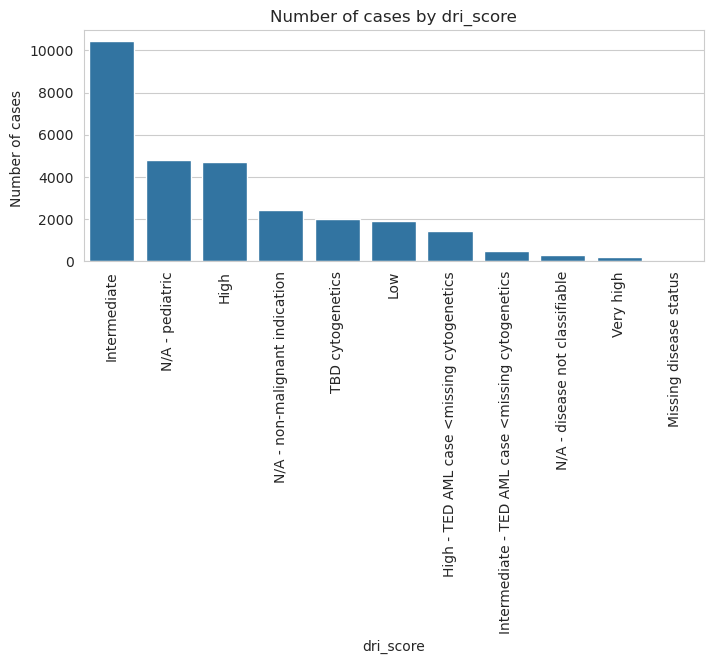

In [135]:
# Plot number of cases by value of dri_score
plot_discrete_feature('dri_score', tick_angle=90, figsize=(8, 3))

**Notes:** This feature represents a categorical disease risk index. This is a relatively high cardinality feature, with 11 levels. Of these, 5 levels are relatively rare, representing 5% of less of cases. For simplicity, we may want to combine some levels. For example, `High - TED AML case <missing cytogenetics` could be binned with `High`. Some of these levels seem to represent missing data: `TDB cytogenetics` and `Missing Disease Status` could be coded as missing data.

##### Distribution of psych_disturb

In [136]:
# View percentage of cases by value of psych_disturb
get_percentages('psych_disturb')

,psych_disturb,percent
0,No,86.04
1,Yes,13.42
2,Not done,0.55


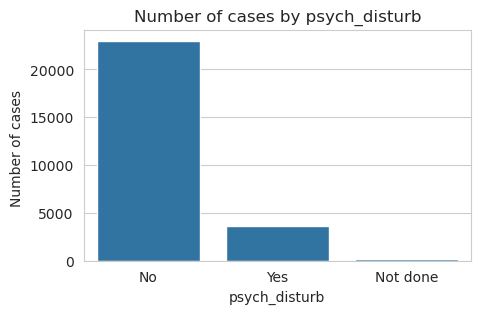

In [137]:
# Plot number of cases by value of psych_disturb
plot_discrete_feature('psych_disturb')

**Notes:** The value of `psych_disturb` is `Yes` in about 13% of cases where this feature is present. This is relatively rare, but potentially still worth considering. We may want to code the rare value `Not done` as missing data.

##### Distribution of cyto_score

In [138]:
# View percentage of cases by value of cyto_score
get_percentages('cyto_score')

,cyto_score,percent
0,Poor,42.46
1,Intermediate,30.75
2,Favorable,14.52
3,TBD,6.47
4,Normal,3.10
5,Other,2.43
6,Not tested,0.27


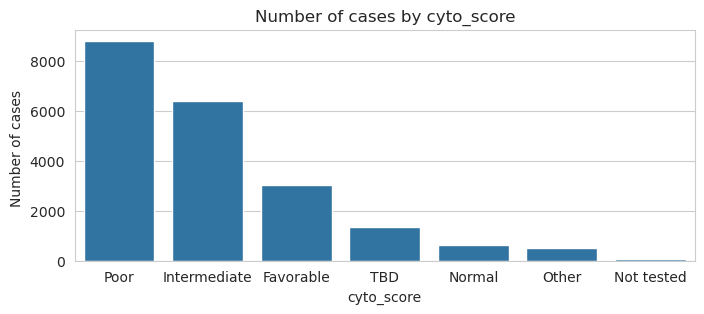

In [139]:
# Plot number of cases by value of cyto_score
plot_discrete_feature('cyto_score', figsize=(8, 3))

**Notes:** This categorical variable encodes the level of abnormality observed while analyzing a patient's bone-marror cells. We may wish to code the values `TBD`, `Other` and `Not tested` as missing data. It's possible that `Normal` should be binned with `Favorable`. Analyzing how these levels correlate with survival times help show whether this make sense.

##### Distribution of diabetes

In [140]:
# View percentage of cases by value of diabetes
get_percentages('diabetes')

,diabetes,percent
0,No,83.21
1,Yes,16.26
2,Not done,0.53


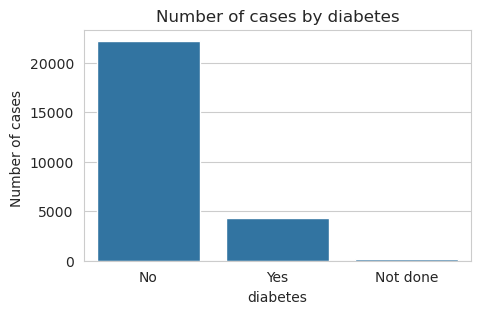

In [141]:
# Plot number of cases by value of diabetes
plot_discrete_feature('diabetes')

**Notes:** For cases where this feature is present, roughly 16% have diabetes. We may wish to thread the `Not done` category as missing data.

##### Distribution of hla_match_c_high

In [142]:
# View percentage of cases by value of hla_match_c_high
get_percentages('hla_match_c_high')

,hla_match_c_high,percent
2,0.0,0.33
1,1.0,22.89
0,2.0,76.78


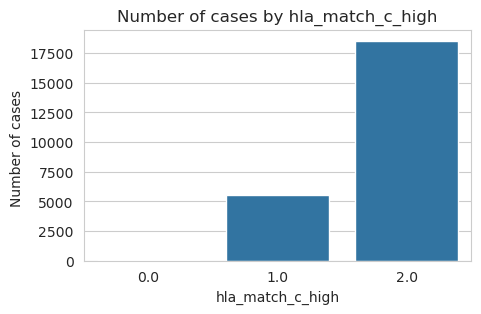

In [143]:
# Plot number of cases by value of hla_match_c_high
plot_discrete_feature('hla_match_c_high')

**Notes:** The feature represents recipient / 1st donor level allel level (high resolution) matching a HLA-C. The fact that less than 0.33% of cases have value `0` is striking. It's possible that donors with a poor match on this allele are usually excluded. We may want to examine these specific cases in more detail--they may be outliers, or unusual in some other way.

##### Distribution of hla_high_res_8

In [144]:
# View percentage of cases by value of hla_high_res_8
get_percentages('hla_high_res_8')

,hla_high_res_8,percent
6,2.0,0.01
5,3.0,0.12
1,4.0,16.63
3,5.0,7.17
4,6.0,6.62
2,7.0,10.38
0,8.0,59.07


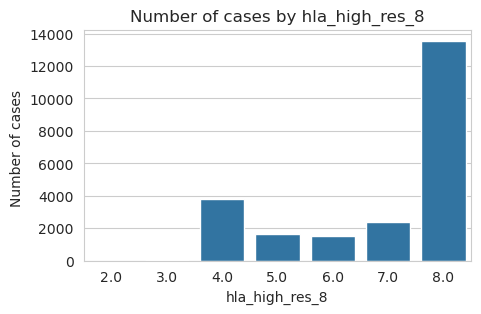

In [145]:
# Plot number of cases by value of hla_high_res_8
plot_discrete_feature('hla_high_res_8')

**Notes:** This feature represents recipient / 1st donor allele-level (high resolution) matching at multiple genetic loci: HLA-A, HLA-B, HLA-C and HLR-DRB1. This takes discrete integer values up to 8. However, we have essentially no values less than 4. The most common value is 8, at almost 60% of cases.

##### Distribution of tbi_status

In [146]:
# View percentage of cases by value of tbi_status
get_percentages('tbi_status')

,tbi_status,percent
0,No TBI,65.49
1,TBI + Cy +- Other,21.19
2,"TBI +- Other, <=cGy",6.00
3,"TBI +- Other, >cGy",5.90
4,"TBI +- Other, -cGy, single",0.47
5,"TBI +- Other, -cGy, fractionated",0.41
6,"TBI +- Other, -cGy, unknown dose",0.27
7,"TBI +- Other, unknown dose",0.26


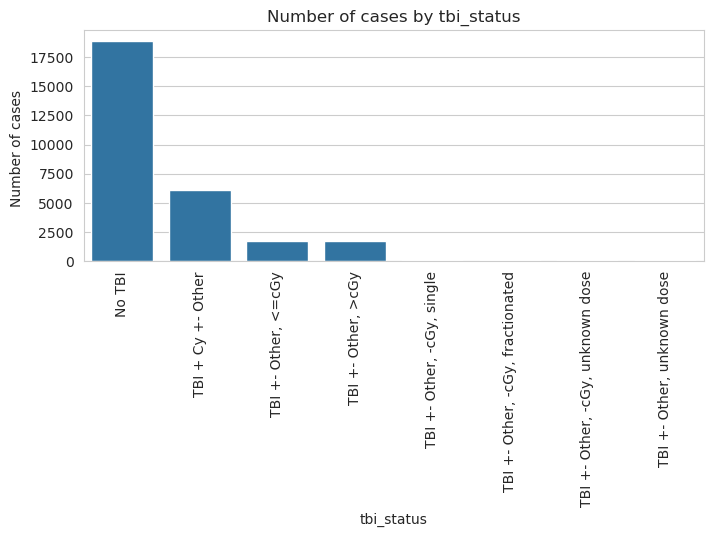

In [147]:
# Plot number of cases by value of tbi_status
plot_discrete_feature('tbi_status', figsize=(8, 3), tick_angle = 90)

**Notes:** Since we are analyzing Leukemia cases, the meaning of `TBI` in this context is likely ["total-body irradiation"](https://www.cancerresearchuk.org/about-cancer/treatment/bone-marrow-stem-cell-transplants/total-body-irradiation-tbi), which is often performed before a bone-marrow or stem-cell transplant.  We will likely need to bin the feature into fewer levels--for example by grouping all except the first two categories together into a single  `Other` category.

##### Distribution of arrhythmia

In [148]:
# View percentage of cases by value of arrhythmia
get_percentages('arrhythmia')

,arrhythmia,percent
0,No,94.76
1,Yes,4.80
2,Not done,0.44


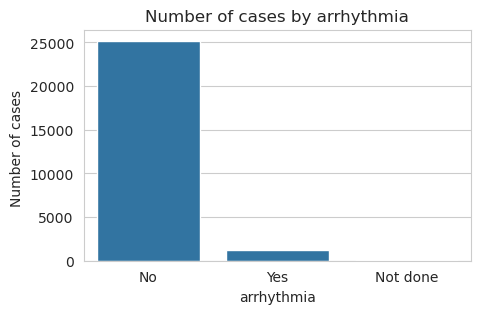

In [149]:
# Plot number of cases by value of arrhythmia
plot_discrete_feature('arrhythmia')

**Notes:** Since the value of arrhythmia is `No` in almost 95% of cases where the feature is present, this feature may not be very useful. Unless it has a very strong relation to the target, this may be one we drop.

##### Distribution of hla_low_res_6

In [150]:
# View percentage of cases by value of hla_low_res_6
get_percentages('hla_low_res_6')

,hla_low_res_6,percent
4,2.0,0.09
1,3.0,19.41
3,4.0,8.05
2,5.0,11.00
0,6.0,61.46


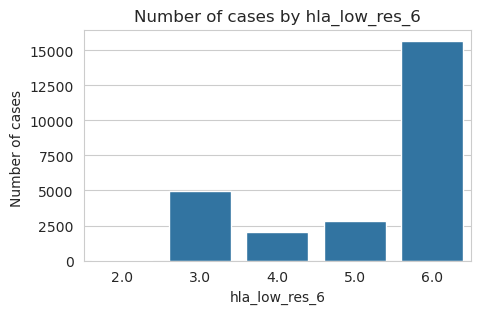

In [151]:
# Plot number of cases by value of hla_low_res_6
plot_discrete_feature('hla_low_res_6')

**Notes:** This feature represents ecipient / 1st donor antigen-level (low resolution) matching at HLA-A,-B,-DRB1. Note that this is similar to the definiton of `hla_high_res_8` refers to high-resolution matching and does not include locus HLA-C. Note also that the feature `hla_match_c_high` encodes high-resolution matchong on HLA-C. Hence `hla_high_res_6` may be redundant, unless one or both of the other two features are missing.

As in the case of `hla_high_res_8` and `hla_match_c_high`, this feature is equal to the maximum value a majority of the time when it is present. Values below 3 are very rare and may be outliers.

##### Distribution of graft_type

In [152]:
# View percentage of cases by value of graft_type
get_percentages('graft_type')

,graft_type,percent
0,Peripheral blood,71.34
1,Bone marrow,28.66


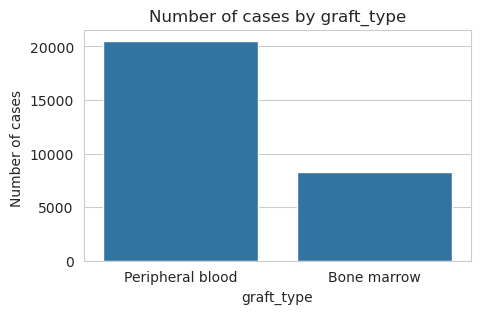

In [153]:
# Plot number of cases by value of graft_type
plot_discrete_feature('graft_type')

**Notes:** This feature has only two values, and both values are reasonable well-respresented in the data.

##### Distribution of vent_hist

In [155]:
# View percentage of cases by value of vent_hist
get_percentages('vent_hist')

,vent_hist,percent
0,No,97.13
1,Yes,2.87


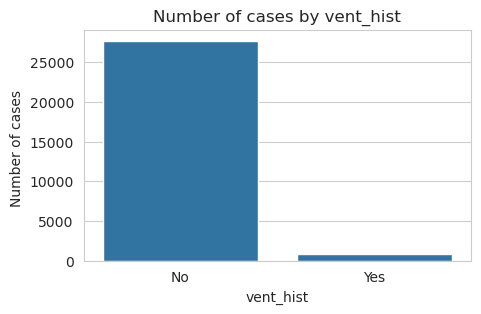

In [156]:
# Plot number of cases by value of vent_hist
plot_discrete_feature('vent_hist')

**Notes:** This feature represents history of mechanical ventilation, and is `Yes` less than 3% of the time. Because mechanical ventilation potentially indicates a serious medical issue, this may be worth exploring further. For example, do we see more `Yes` values during the peak COVID-19 years, indicating that it may be a proxy for severe COVID-19 infection?

##### Distribution of renal_issue

In [161]:
# View percentage of cases by value of renal_issue
get_percentages('renal_issue')

,renal_issue,percent
0,No,98.75
1,Yes,0.74
2,Not done,0.51


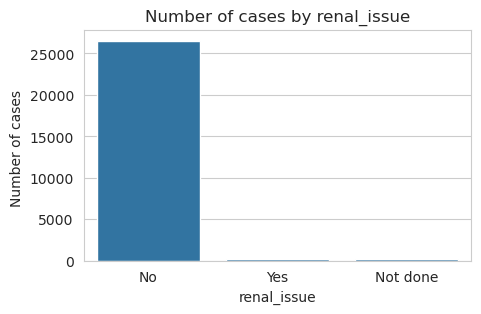

In [162]:
# Plot number of cases by value of renal_issue
plot_discrete_feature('renal_issue')

**Notes:** This feature encodes the presence of moderate to severe kidney issues, with 98% of the values being `No`. Since this is a low-variance feature, it may not be useful for our model. Alternatively, we may want to combine it with other rare health issues such as history of mechanical ventilation. We may wish to code `Not done` as missing data.

##### Distribution of pulm_severe

In [166]:
# View percentage of cases by value of pulm_severe
get_percentages('pulm_severe')

,pulm_severe,percent
0,No,92.93
1,Yes,6.40
2,Not done,0.68


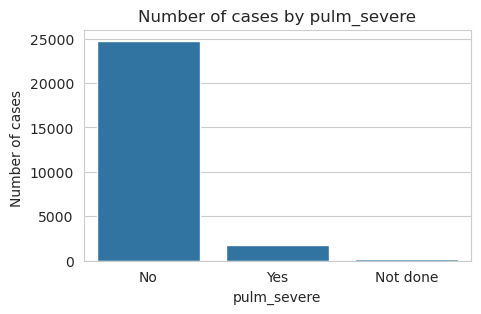

In [168]:
# Plot number of cases by value of pulm_severe
plot_discrete_feature('pulm_severe')

**Notes:** This feature encodes the presence of severe pulmonary issues, with 93% of the values being `No`. Since this is a low-variance feature, it may not be useful for our model. Alternatively, we may want to combine it with other rare health issues such as history of mechanical ventilation. We may wish to code `Not done` as missing data.

##### Distribution of prim_disease_hct

In [170]:
# View percentage of cases by value of prim_disease_hct
get_percentages('prim_disease_hct')

,prim_disease_hct,percent
0,ALL,28.13
1,AML,24.77
2,MDS,10.58
3,IPA,5.97
4,MPN,5.75
5,IEA,5.03
6,NHL,4.58
7,IIS,3.56
8,PCD,3.02
9,SAA,2.48


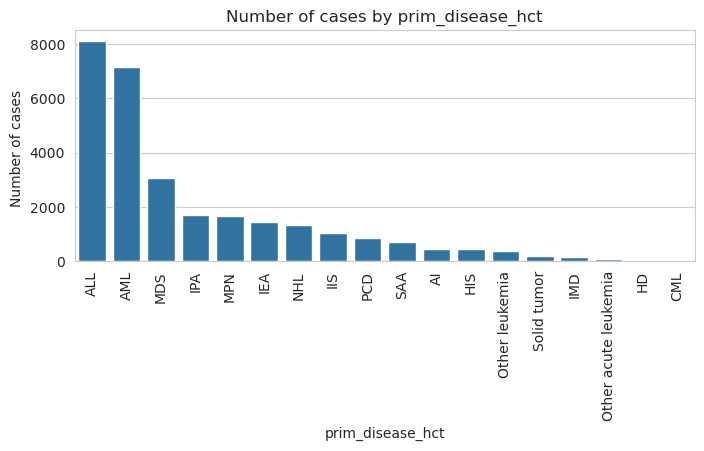

In [172]:
# Plot number of cases by value of prim_disease_hct
plot_discrete_feature('prim_disease_hct', figsize=(8, 3), tick_angle=90)

**Notes:** This is a high-cardinality feature. There are 17 values total. Of these, 11 account for less than 5% of cases each. We may wish to bin less-common values together into an "other" category. 

##### Distribution of hla_high_res_6

In [173]:
# View percentage of cases by value of hla_high_res_6
get_percentages('hla_high_res_6')

,hla_high_res_6,percent
5,0.0,0.00
4,2.0,0.18
1,3.0,19.54
3,4.0,9.05
2,5.0,11.59
0,6.0,59.63


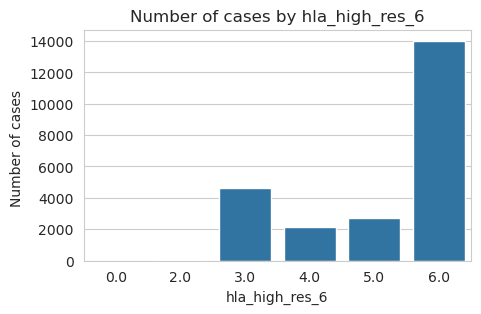

In [174]:
# Plot number of cases by value of hla_high_res_6
plot_discrete_feature('hla_high_res_6')

**Notes:** This feature encodes recipient / 1st donor allele-level (high resolution) matching at HLA-A,-B,-DRB1. This is identical to `hla_low_res_6`, except that the matching is high-resolution instead of low. The distributions of the two features are also quite similar, with a majority of values equal to 6 and virtually none less than 3. These two features are likely to be very highly correlated. However, before discarding either, we may want to examine how often a patient has non-missing data in one of the two, but not both.

##### Distribution of cmv_status

In [179]:
# View percentage of cases by value of cmv_status
get_percentages('cmv_status')

,cmv_status,percent
0,+/+,48.27
1,-/+,25.14
2,+/-,14.37
3,-/-,12.22


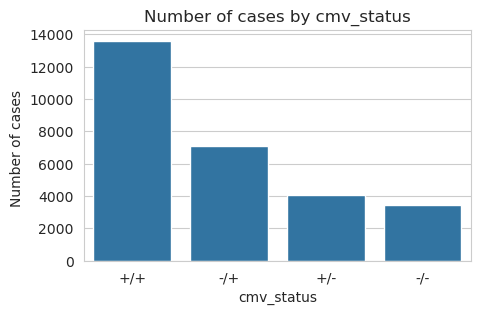

In [180]:
# Plot number of cases by value of cmv_status
plot_discrete_feature('cmv_status')

**Notes:**  This feature encodes donor/recipient CMV serostatus--that is, presence of [antibodies to CMV](https://pmc.ncbi.nlm.nih.gov/articles/PMC3512215/) in the donor's and recipient's blood. It appears that a majority of both donors are recipients are positive. However, each of the four posible combinations is represented reasonably well in the data. 

##### Distribution of hla_high_res_10

In [183]:
# View percentage of cases by value of hla_high_res_10
get_percentages('hla_high_res_10')

,hla_high_res_10,percent
7,3.0,0.00
6,4.0,0.12
1,5.0,14.61
3,6.0,6.26
5,7.0,5.45
4,8.0,6.07
2,9.0,10.95
0,10.0,56.53


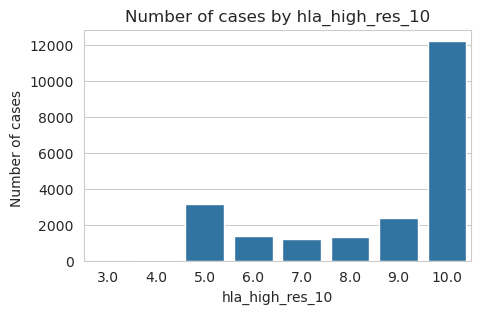

In [184]:
# Plot number of cases by value of hla_high_res_10
plot_discrete_feature('hla_high_res_10')

**Notes:** This feature encodes recipient / 1st donor allele-level (high resolution) matching at generic loci HLA-A,-B,-C,-DRB1, -DQB1. Note that this is identical to `hla_high_res_8` except for present of a new allele, `DQB1`. Since we also have a feature `hla_match_dbq1_high`, the feature may be redunant unless either `hla_high_res_8` or `hla_match_dbq1_high` are missing.

##### Distribution of hla_match_dqb1_high

In [185]:
# View percentage of cases by value of hla_match_dqb1_high
get_percentages('hla_match_dqb1_high')

,hla_match_dqb1_high,percent
2,0.0,0.33
1,1.0,25.66
0,2.0,74.01


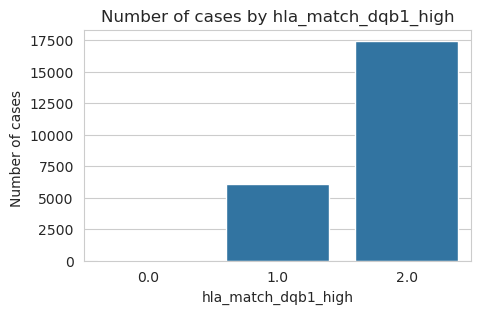

In [186]:
# Plot number of cases by value of hla_match_dqb1_high
plot_discrete_feature('hla_match_dqb1_high')

**Notes:** This feature encodes recipient / 1st donor allele level (high resolution) matching at HLA-DQB1, one of the alleles included in `hla_high_res_10`. As with other HLA match feature we've seen so a majority of cases take the maximum possible value. Virtually no cases have a value 0. These may be outliers.

##### Distribution of tce_imm_match

In [192]:
# View percentage of cases by value of tce_imm_match
get_percentages('tce_imm_match')

,tce_imm_match,percent
0,P/P,74.23
1,G/G,14.28
2,H/H,6.14
3,G/B,3.08
4,H/B,1.30
5,P/H,0.47
6,P/B,0.37
7,P/G,0.14


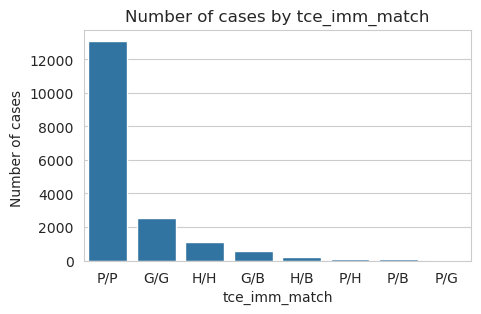

In [193]:
# Plot number of cases by value of tce_imm_match
plot_discrete_feature('tce_imm_match')

**Notes:** This feature encodes T-cell [epitope](https://en.wikipedia.org/wiki/Epitope) immunogenicity/diversity match. Epiptopes are short sequences of amino acids which are recognized by T-cells. An epiptope mismatch between donor and recipient may cause the recipient's immune system to attack the donor cells. The majority of cases in our data are matches of type P/P. Non-matching combinations between donor and recipient are rare. We may want to bin these as a `mismatched` category.

##### Distribution of hla_nmdp_6

In [194]:
# View percentage of cases by value of hla_nmdp_6
get_percentages('hla_nmdp_6')

,hla_nmdp_6,percent
4,2.0,0.14
1,3.0,19.87
3,4.0,5.20
2,5.0,13.40
0,6.0,61.39


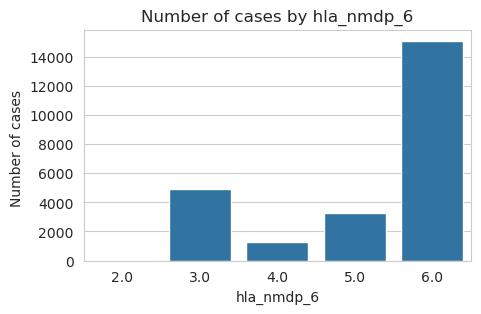

In [195]:
# Plot number of cases by value of hla_nmdp_6
plot_discrete_feature('hla_nmdp_6')

**Notes:** This feature encodes recipient / 1st donor matching at HLA-A(lo),-B(lo),-DRB1(hi). Assuming "lo" and "hi" refer to low-resolution and high-resolution matching, this should be quite similar to the feature `hla_low_res_6`. However, it's possible that we will have patients with non-missing data in only one of these two features.